## Scrapping external data with yahoo finance

Author: Vincent Butti 10th November 2020

WHAT IS DOES ?

#1 load multiple stock in one dataframe with yfinannce. Here we load the financial market info of the 10 most valuated crytpo

#2 save each crypto in a separate csv

#3 Create a dictionary of stocks to access each stock

#4 create profile report of each crypto and save as html

#5 first data viz with mpl finance

WHAT STOCK ARE WE USING ?

we choose to load values of the 10 most valuated cryptomoney (2020_04_20), namely:

Bitcoin (BTC) $128bn, Ethereum (ETH) $19.4bn, XRP (XRP) $8.22bn, Tether (USDT) $6.4bn,  Bitcoin Cash (BCH) $4.1bn,  Bitcoin SV (BSV) $3.4bn, Litecoin (LTC) $2.6bn,  EOS (EOS) $2.4bn,  Binance Coin (BNB) $2.4bn ,Tezos (XTZ) $1.5bn

we'll later load alleged correlated stock records such as gold index, S&P500...

In [12]:
# -*- coding: utf-8 -*-

In [4]:
import yfinance as yf # https://github.com/ranaroussi/yfinance
import pandas as pd
from datetime import date
from pandas_profiling import ProfileReport

# visual package
import mplfinance as mpf
mpf.__version__


'0.12.7a0'

## #1 load multiple stock in one multidindex pandas dataframe with yfinannce

In [ ]:
#set your data file location 
path_data = input("set your data file path: ")
print("your data will be stored at this file path : ", path_data)

In [ ]:
#path_data = "C:/PROJET/CRYPTO/data/"

In [5]:
def scrap_yahoo_fin(stock_list, start, end, period =None, interval = None, prepost = False,auto_adjust = True, actions =True ):
    """
        stock_list = either a str typed ticker (ex: "dxy") or a list (ex: ['DXY', "INX"])
        period: data period to download (Either Use period parameter or use start and end) Valid periods are: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
        interval: data interval (intraday data cannot extend last 60 days) Valid intervals are: 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo
        start: If not using period - Download start date string (YYYY-MM-DD) or datetime.
        end: If not using period - Download end date string (YYYY-MM-DD) or datetime.
        prepost: Include Pre and Post market data in results? (Default is False)
        auto_adjust: Adjust all OHLC automatically? (Default is True)
        actions: Download stock dividends and stock splits events? (Default is True)
    """
    data = yf.download(stocks, start=start, end=end)
    return data

In [6]:
stocks = ["BTC-USD","ETH-USD", "XRP-USD", "USDT-USD", "BCH-USD", "BSV-USD", "LTC-USD", "EOS-USD", "BNB-USD", "XTZ-USD"]

# start and en perid comes form date index of min and max  historical data of bitcoin EUR
start ="2013-10-06" 
end ="2020-11-08"

df = scrap_yahoo_fin(stock_list = stocks, start =start, end =end)

[*********************100%***********************]  10 of 10 completed


In [ ]:
# # Saving our maxi dataframe as a "pickle" object with pcikel.dump
# import pickle
# with open(path_data+ "yahoo_finance/" + "10_best_crypto_pickle", "wb+") as f:
#     pickle.dump(df, f)
    
# # if we want to retrieve our "pickle" object, use pickle load
# with open(path_data+ "yahoo_finance/" + "10_best_crypto_pickle", "rb+") as f:
#     data = pickle.load(f)

In [7]:
# our data are collected in a pandas MULTIINDEX dataframe
print(df.columns)
print(df.tail(10))

MultiIndex([('Adj Close',  'BCH-USD'),
            ('Adj Close',  'BNB-USD'),
            ('Adj Close',  'BSV-USD'),
            ('Adj Close',  'BTC-USD'),
            ('Adj Close',  'EOS-USD'),
            ('Adj Close',  'ETH-USD'),
            ('Adj Close',  'LTC-USD'),
            ('Adj Close', 'USDT-USD'),
            ('Adj Close',  'XRP-USD'),
            ('Adj Close',  'XTZ-USD'),
            (    'Close',  'BCH-USD'),
            (    'Close',  'BNB-USD'),
            (    'Close',  'BSV-USD'),
            (    'Close',  'BTC-USD'),
            (    'Close',  'EOS-USD'),
            (    'Close',  'ETH-USD'),
            (    'Close',  'LTC-USD'),
            (    'Close', 'USDT-USD'),
            (    'Close',  'XRP-USD'),
            (    'Close',  'XTZ-USD'),
            (     'High',  'BCH-USD'),
            (     'High',  'BNB-USD'),
            (     'High',  'BSV-USD'),
            (     'High',  'BTC-USD'),
            (     'High',  'EOS-USD'),
            (     'High',

In [8]:
# if we want to acces the values of a specific asset, we shout use th get_level_values
df.iloc[:, df.columns.get_level_values(1) == "BTC-USD"]

,Adj Close,Close,High,Low,Open,Volume
,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2014-09-17,457.334015,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,398.821014,412.425995,393.181000,408.084991,26580100
...,...,...,...,...,...,...
2020-11-03,13950.300781,13950.300781,13984.981445,13325.441406,13550.451172,29869951617
2020-11-04,14133.707031,14133.707031,14218.766602,13580.471680,13950.488281,35116364961


In [9]:
# our multiindex datframe has 2 level("0", "1") on the columns

#For example, if we want to acces the "0" level
print("Level 0 of our dataframes:","\n", df.columns.get_level_values(0),"\n")

# on that "0"th level we can acces the "open" values of our assets
print("'Open' values of  Level 0 of our dataframes:","\n", df.iloc[:,df.columns.get_level_values(0)==  "Open"],"\n")

#or to access values of 1 specific asset of a currency on level "1"
print("Financial info for one specific crypto 'BTC-USD'", df.iloc[:, df.columns.get_level_values(1) == "BTC-USD"])

Level 0 of our dataframes: 
 Index(['Adj Close', 'Adj Close', 'Adj Close', 'Adj Close', 'Adj Close',
       'Adj Close', 'Adj Close', 'Adj Close', 'Adj Close', 'Adj Close',
       'Close', 'Close', 'Close', 'Close', 'Close', 'Close', 'Close', 'Close',
       'Close', 'Close', 'High', 'High', 'High', 'High', 'High', 'High',
       'High', 'High', 'High', 'High', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Open', 'Open', 'Open', 'Open',
       'Open', 'Open', 'Open', 'Open', 'Open', 'Open', 'Volume', 'Volume',
       'Volume', 'Volume', 'Volume', 'Volume', 'Volume', 'Volume', 'Volume',
       'Volume'],
      dtype='object') 

'Open' values of  Level 0 of our dataframes: 
                   Open                                                 \
               BCH-USD    BNB-USD     BSV-USD       BTC-USD   EOS-USD   
Date                                                                    
2014-09-17         NaN        NaN         NaN    465.864014       N

## #2 save each crypto in a separate csv 

In [ ]:
# split the mulitindex datafrmaes to separate dataframe for each cryptocurrency and save csv for each value
for idx,gp in df.groupby(level=1, axis=1): gp.xs(idx, level=1, axis=1).to_csv(path_data+ "yahoo_finance/"+ f'{idx}.csv')

In [ ]:
# split the mulitindex datafrmaes to separate dataframe of all crypto for each type of values(("open, close"....) and save csv for each value

for idx,gp in df.groupby(level=0, axis=1): gp.xs(idx, level=0, axis=1).to_csv(path_data+ "yahoo_test/"+ f'{idx}.csv')

## #3 Create a dictionary of crypto to access each crypto as a single pandas dataframe

In [10]:
# we create a dictionnary to access each cryptocurrency info, which a stroed in a dataframe
df_stocks_dict = {idx: gp.xs(idx, level=1, axis=1) for idx,gp in df.groupby(level=1, axis=1)}

print(df_stocks_dict.keys(), '\n\n')

# to access a specific crypto ('BCH-USD'), which is stored as pandas datframe datatype
print("BCH-USD","\n", df_stocks_dict["BCH-USD"].tail(10))

dict_keys(['BCH-USD', 'BNB-USD', 'BSV-USD', 'BTC-USD', 'EOS-USD', 'ETH-USD', 'LTC-USD', 'USDT-USD', 'XRP-USD', 'XTZ-USD']) 


BCH-USD 
              Adj Close       Close        High         Low        Open  \
Date                                                                     
2020-10-29  267.056061  267.056061  271.242920  258.674622  268.490204   
2020-10-30  261.828125  261.828125  269.542145  256.430389  267.056793   
2020-10-31  261.758240  261.758240  265.492676  259.806030  261.828125   
2020-11-01  267.555817  267.555817  269.495972  260.105957  261.758240   
2020-11-02  257.199707  257.199707  270.826324  255.188477  267.554413   
2020-11-03  244.146835  244.146835  258.704041  236.866760  257.199005   
2020-11-04  241.130096  241.130096  244.535904  232.355469  244.146500   
2020-11-05  249.547333  249.547333  251.629700  241.142044  241.142044   
2020-11-06  257.720184  257.720184  259.037781  248.193253  249.546494   
2020-11-07  253.590408  253.590408  276.048553  24

In [ ]:
# saving the dictionnary of dataframe for each crytpo


with open(path_data+ "yahoo_finance/" + "pickle_dict_crypto_stocks", "wb+") as f:
    pickle.dump(df_stocks_dict, f)

In [ ]:
df.columns.get_level_values(0)

In [ ]:
df.columns.get_level_values(0).unique()

In [ ]:
# if we want to create a new simple (aka non multiindex) dataframe based on "open" value

# choose the value we want to select from, here 'Open' columns for each crypto
 = df.iloc[:,df.columns.get_level_values(0) ==  "Open"]

# then drop the level we want to suppres ("0"th level which correspond to "Open")
a.columns= a.columns.droplevel(0)

# we now have a simple dataframe that contains all the "Open" values
a


In [ ]:
# we can tranpose our datframe for further analysis
a_transposed = a.T
a_transposed

In [ ]:
a_transposed.index

In [ ]:
df_stocks_dict[stocks[0]]

## #4 create profile report of each crypto and save as html


In [ ]:
# Generating pandas-profile report for each crypto using "pandas profiling" (doc: https://github.com/pandas-profiling/pandas-profilingfrom pandas_profiling import ProfileReport
# It generates and save an html report for each crypto with 
for n in range(len(stocks)):
    profile = df_stocks_dict[stocks[n]].profile_report(title = stocks[n], explorative=True)
    profile.to_widgets()
    #save the html report 
    profile.to_file(path_data+ "yahoo_finance/" + stocks[n] +".html")

## another way to load data form yahoo finance

In [3]:
## loading DXY dollar index
msft = yf.Ticker("DXY")
## loading DXY dollar index
SP500 = yf.Ticker("INX")

# get stock info
#print(msft.info)  #not working

# get historical market data
DXY = msft.history(start = start, end = end)
SP500 = SP500.history(start = start, end = end)

#saving data to csv file
# DXY.to_csv(path_data + 'DXY.csv')
# SP500.to_csv(path_data+ 'SP500.csv')

NameError: name 'start' is not defined

## Visual trailer

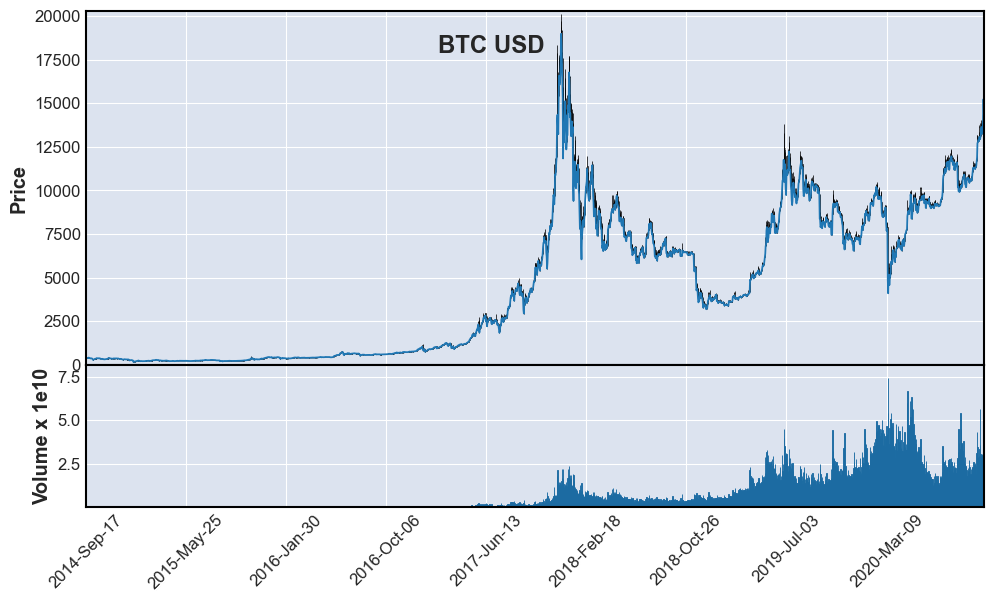

In [11]:
import mplfinance as mpf
mpf.__version__

btc = df_stocks_dict["BTC-USD"]

apdict0 = mpf.make_addplot(btc["High"])
apdict1 = mpf.make_addplot(btc["Low"])
mpf.plot(btc,addplot= apdict1 , figratio=(18,10), tight_layout=True, volume=True, title ="BTC USD",
        ##savefig=path_data + 'btc-usd.png',
        )